
##EDA



In [82]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import os
import seaborn as sns
sns.set(font_scale=1.5, style="whitegrid")

Se importa el dataframe y se borra la última columna que no aporta nada al ejercio

In [83]:
df = pd.read_csv('/content/data_file.txt', sep="\t")
df1 = df.iloc[:, :-1]
print(df1.head())
print(df1.shape)

     # STATION                     STATION_NAME  ELEVATION  LATITUDE  \
0  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
1  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
2  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
3  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   
4  COOP:352709  EUGENE MAHLON SWEET FIELD OR US      107.6  44.12778   

   LONGITUDE            DATE  HPCP(cm)  
0 -123.22056  20000101 01:00      0.00  
1 -123.22056  20000101 02:00      0.00  
2 -123.22056  20000101 05:00      0.00  
3 -123.22056  20000101 06:00      0.00  
4 -123.22056  20000101 08:00      0.51  
(23839, 7)


In [84]:
#Access the 7th column (index 6) using .iloc[] for integer-based indexing
mean = np.mean(df1.iloc[:, 6])
std = np.std(df1.iloc[:, 6])
print("Mean= ", mean)
print("Standard Deviation:0 ", std)

Mean=  0.532994253114644
Standard Deviation:0  0.9557358610652827


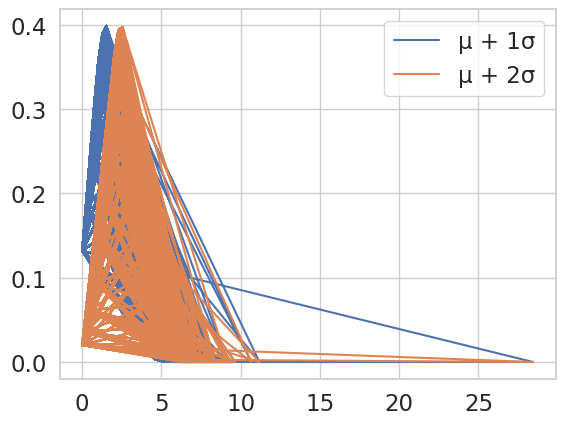

In [85]:
from scipy.stats import norm
import matplotlib.pyplot as plt
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + std), label='μ + 1σ')
plt.plot(df.iloc[:, 6], norm.pdf(df.iloc[:, 6], mean + 2 * std), label='μ + 2σ')
plt.legend()
plt.show()

In [86]:
df = np.genfromtxt('/content/data_file.txt', delimiter="\t", dtype=None, encoding=None, names=True) # Load data with column names
# Convert the NumPy ndarray to a Pandas DataFrame
df = pd.DataFrame(df)  # This line converts the structured array to a DataFrame

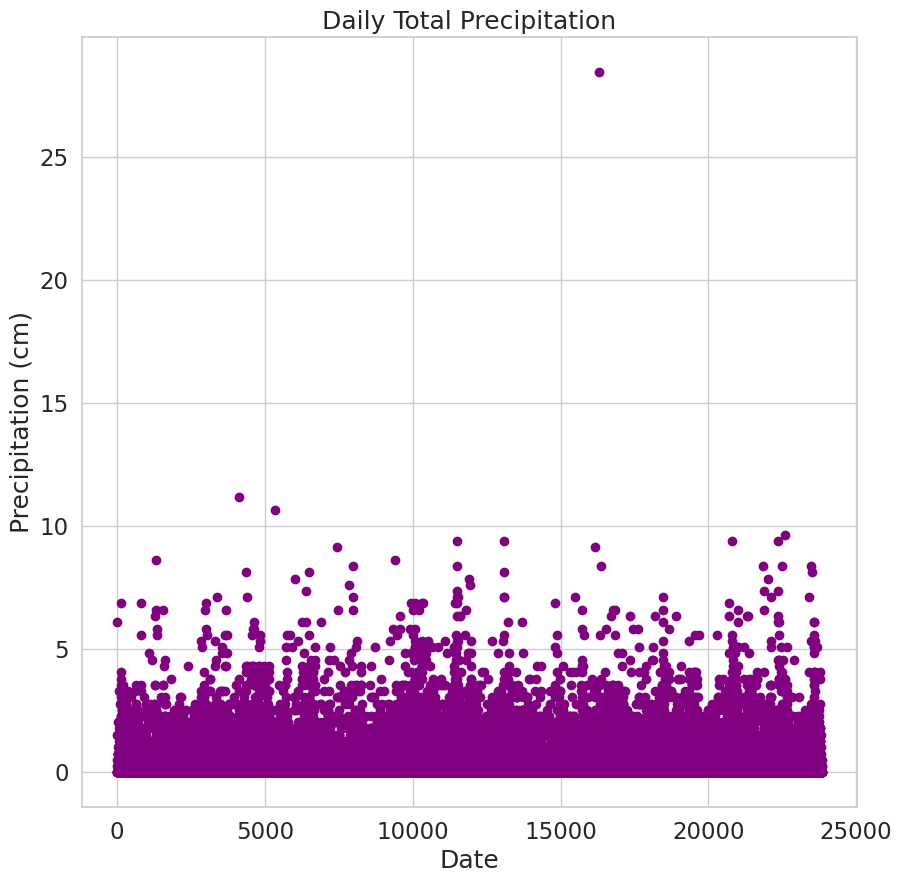

In [87]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.scatter(df.index.values,df["HPCPcm"],color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (cm)",
       title="Daily Total Precipitation")

plt.show()

Se observa outliers en los datos por lo que se hace filtrado. Se crea un nuevo DataFrame llamado 'df_filtrado' que contiene solo las filas donde los valores en la columna "HPCPcm" son menores o iguales a 10.

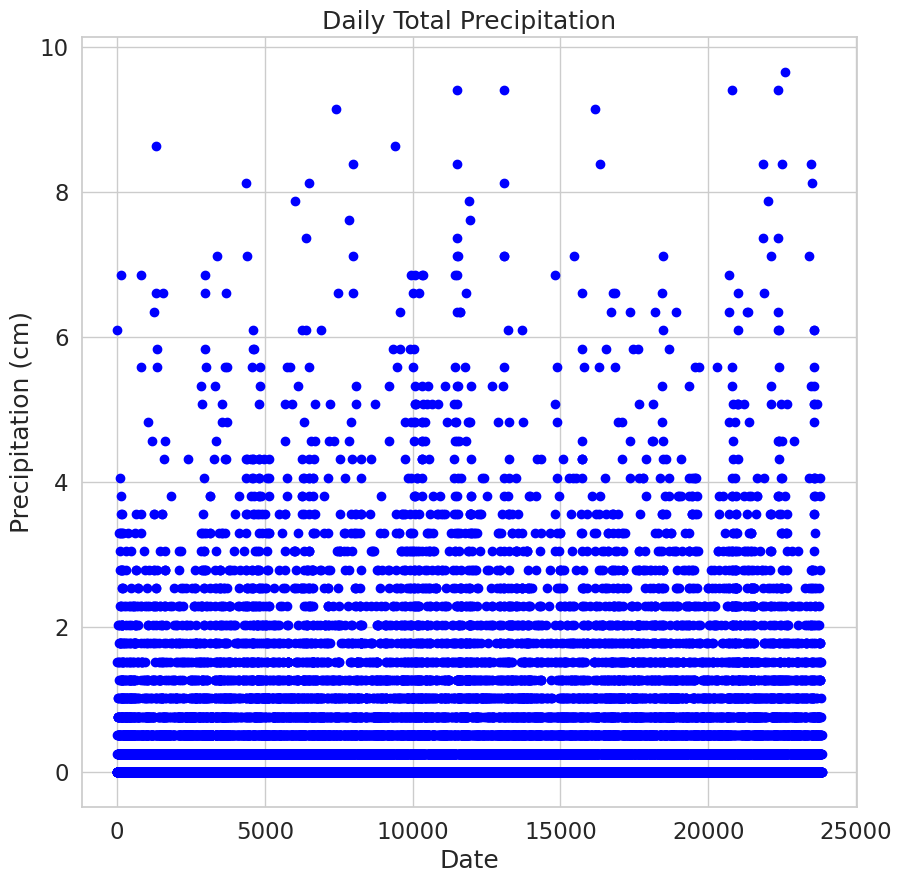

In [90]:
df_filtrado = df1[df1["HPCP(cm)"] <= 10]

#Dibujar nuevamente la grafica
fig, ax = plt.subplots(figsize=(10, 10))
# Add x-axis and y-axis
ax.scatter(df_filtrado.index.values,df_filtrado["HPCP(cm)"],color='blue')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Precipitation (cm)",
       title="Daily Total Precipitation")

plt.show()

Se modifica el formato de fecha:     Se convierte una cadena de fecha y hora en formato 'YYYYMMDD HH:MM' a un valor numérico.

In [92]:
from datetime import datetime

def convert_to_numeric_date(date_str):
  """Converts a date string in 'YYYYMMDD HH:MM' format to a numeric date."""
  try:
    date_obj = datetime.strptime(date_str, "%Y%m%d %H:%M")
    numeric_date = int(date_obj.timestamp())
    return numeric_date
  except ValueError:
    # Handle invalid date strings, e.g., return NaN or a default value
    return pd.NaT  # Or return None, 0, etc.

# Create a new DataFrame with the converted date column
new_df = df_filtrado.copy()  # Avoid modifying the original DataFrame
new_df['NUMERIC_DATE'] = new_df['DATE'].apply(convert_to_numeric_date)
new_df['HPCPcm'] = new_df['HPCP(cm)'] * 10
new_df

,# STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP(cm),NUMERIC_DATE,HPCPcm
0,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 01:00,0.00,946688400,0.0
1,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 02:00,0.00,946692000,0.0
2,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 05:00,0.00,946702800,0.0
3,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 06:00,0.00,946706400,0.0
4,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 08:00,0.51,946713600,5.1
...,...,...,...,...,...,...,...,...,...
23834,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 09:00,0.25,1387789200,2.5
23835,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 12:00,0.00,1387800000,0.0
23836,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 13:00,0.00,1387803600,0.0
23837,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 19:00,0.51,1387825200,5.1


Nuevo grafico de Precipitación Vs Fechas Numericas, se transforma la columna HPCP (cm) a HPCP (mm)

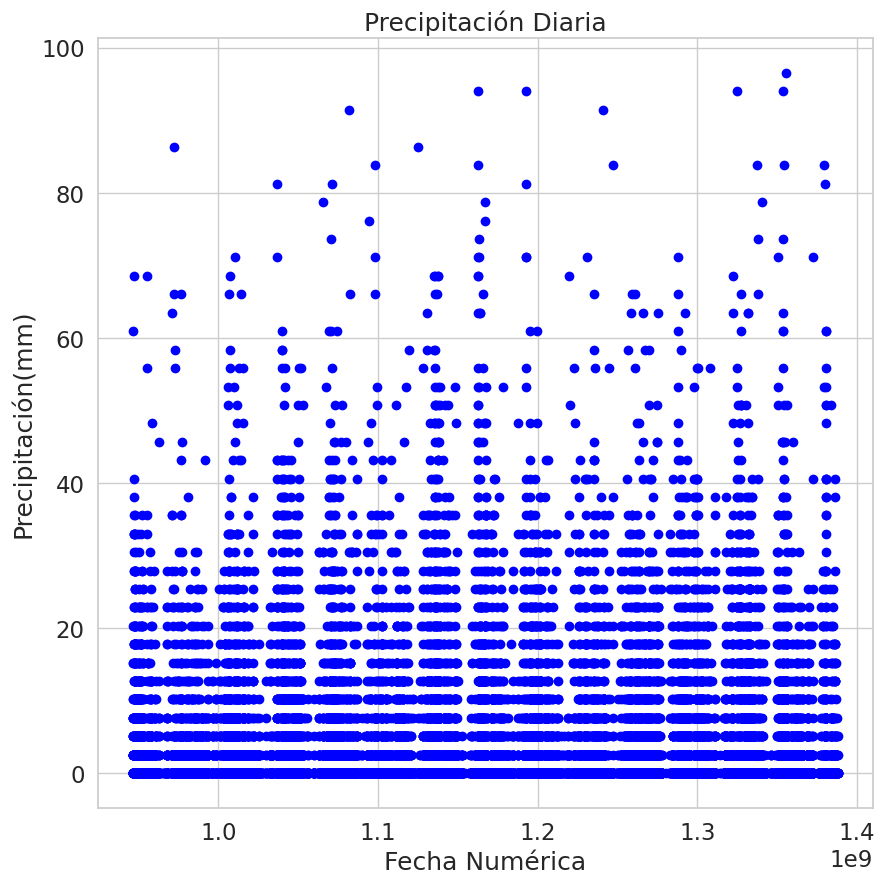

In [93]:
# Crea el scatter plot
plt.figure(figsize=(10, 10))  # Ajusta el tamaño de la figura si lo necesitas
plt.scatter(new_df['NUMERIC_DATE'], new_df['HPCPcm'], color='blue', marker='o')

# Configura los ejes y el título
plt.xlabel('Fecha Numérica')
plt.ylabel('Precipitación(mm)')
plt.title('Precipitación Diaria')

# Muestra el gráfico
plt.show()

Se mejora la Figura anterior (Con ayuda de inteligencia artificial)

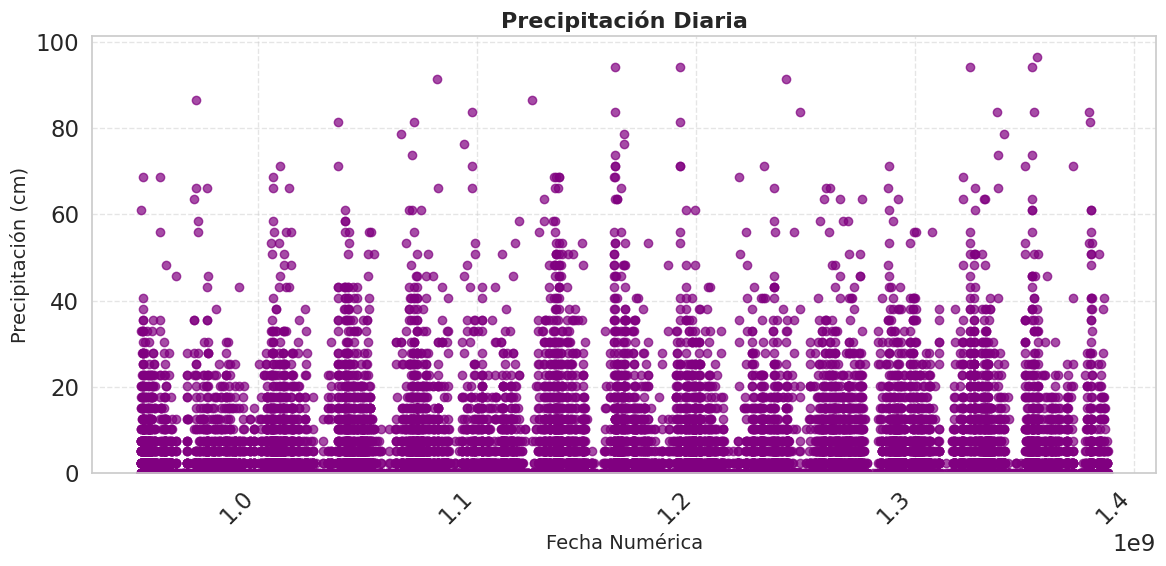

In [94]:
import matplotlib.pyplot as plt

# Crea el scatter plot
plt.figure(figsize=(12, 6))  # Ajusta el tamaño de la figura para mejor visibilidad
plt.scatter(new_df['NUMERIC_DATE'], new_df['HPCPcm'], color='purple', marker='o', alpha=0.7)
# alpha para transparencia, facilita ver la densidad de puntos

# Configura los ejes y el título con mayor tamaño y estilo
plt.xlabel('Fecha Numérica', fontsize=14)
plt.ylabel('Precipitación (cm)', fontsize=14)
plt.title('Precipitación Diaria', fontsize=16, fontweight='bold')

# Ajusta los límites del eje y si es necesario para evitar puntos muy pegados al borde
plt.ylim(bottom=0)  # Por ejemplo, para asegurar que la precipitación no sea negativa

# Agrega una cuadrícula para facilitar la lectura
plt.grid(True, linestyle='--', alpha=0.5)  # Estilo y transparencia de la cuadrícula

# Rota las etiquetas del eje x si es necesario para evitar superposiciones
plt.xticks(rotation=45, ha='right')  # Rota 45 grados y alinea a la derecha

# Muestra el gráfico
plt.tight_layout()  # Ajusta automáticamente los elementos para evitar superposiciones
plt.show()

Regresión lineal con scikitlearn

Coefficients: [1.18186778e-09]
Intercept: 3.969843757860089
R^2: 0.00032560196967745814
MSE: 87.14943877208387


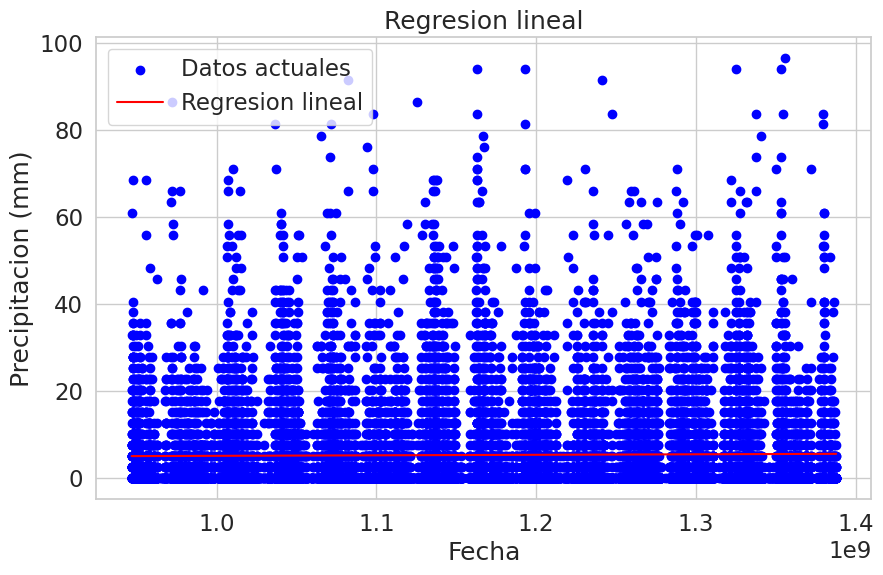

In [95]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Prepare the data
# Reshape X to be a 2D array (column vector)
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Features (independent variables)
y = new_df['HPCPcm']  # Target (dependent variable)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the entire dataset 'X' to get y_pred
y_pred = model.predict(X) # This line is added to calculate y_pred

# Print the coefficients and intercept and calculate metrics
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
#print('coeficiente de determinación (R^2): ', model.score(X_train, y_train))
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
print('R^2:', r2)
print('MSE:', mse)

# 7. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos actuales')
plt.plot(X, y_pred, color='red', label='Regresion lineal')
plt.xlabel('Fecha')
plt.ylabel('Precipitacion (mm)')
plt.title('Regresion lineal')
plt.legend()
plt.show()

Con las metricas de la regresion lineal (mse y R2) se observa q la calidad del ajuste entre los datos reales y el modelo de regresión es muy malo. Un valor de R2 cercano acero se considera muy malo y un valor a partir de 0,8 se considera aceptable.
Nota: R2 es una primera medida que se debe complementar con otras para evaluar el modelo de regresión lineal.

## Se calcula el coeficiente de correlación entre las variables precipitación y fechas.

In [96]:
# Cálculo del coeficiente de correlación lineal
print("coeficiente de correlación lineal=", model.score(X_test, y_test))

coeficiente de correlación lineal= 0.00031031255298319405


### Nota: El coeficiente de correlación lineal es una medida estadística que cuantifica la relación lineal entre dos variable. Indica la intensidad de la relación entre las variables y permite establecer una correlación lineal entre ellas. Como el valor es cercano a CERO, indica la intensidad de la relación entre las variables es casi nula.

In [97]:
# Podemos predecir usando el modelo
from sklearn.metrics import mean_squared_error, r2_score # Import mean_squared_error and r2_score

y_pred = model.predict(X_test)

# Por último, calculamos el error cuadrático medio
print (f'\nError cuadrático medio:', mean_squared_error(y_test, y_pred))


Error cuadrático medio: 85.16463564232443


El error cuadrático medio (MSE) es una métrica que se utiliza para evaluar la eficacia de los modelos estadísticos. Mide el promedio de los errores al cuadrado de las predicciones, es decir, la diferencia entre el estimador y lo que se estima.

##Interpretación de un MSE de 85.16463564232443
Un MSE de 85.16 indica que, en promedio, el error al cuadrado entre los valores predichos y los valores reales es de aproximadamente 85. Esto significa que hay cierta discrepancia entre los valores reales y los predichos, pero para interpretarlo mejor se necesita contexto sobre los valores de los datos originales. Si los valores reales están en una escala grande, un MSE de 85 puede ser aceptable; en cambio, si están en una escala pequeña, el error podría ser alto.

En resumen: el modelo tiene un ajuste deficiente.

#Regresión Polinomial de grado 2

Coefficients: [ 0.00000000e+00 -5.00693060e-09  2.75831068e-18]
Intercept: 7.355618780794563
R^2: 0.0003683065729260804
MSE: 87.14571587769602


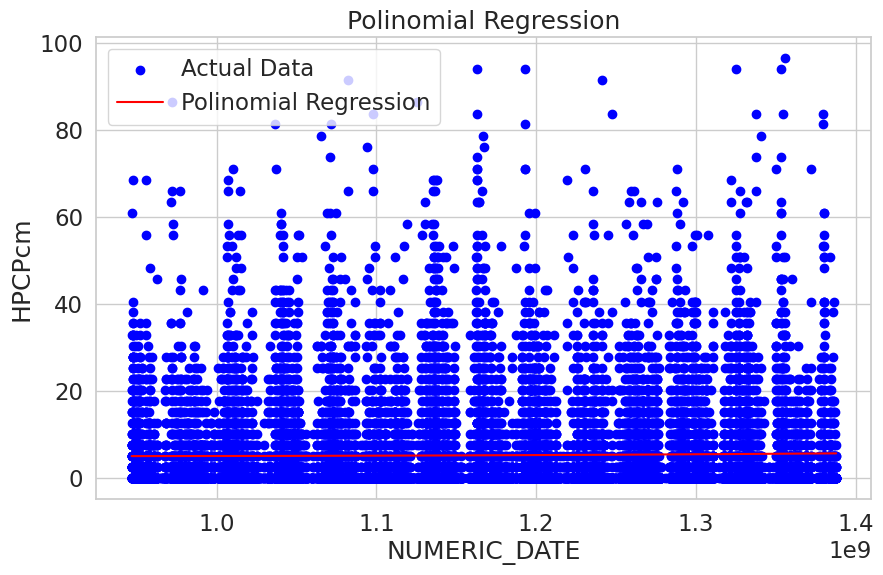

In [98]:
# Import PolynomialFeatures from sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score

# 1. Prepare the data
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Independent variable
y = new_df['HPCPcm']  # Dependent variable

# 2. Create polynomial features
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_poly, y)

# 4. Make predictions
y_pred = model.predict(X_poly)

# 5. Calculate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 6. Print the results
print('Coefficients:', model.coef_)
print('Intercept:', model.intercept_)
print('R^2:', r2)
print('MSE:', mse)

# 7. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Polinomial Regression')
plt.xlabel('NUMERIC_DATE')
plt.ylabel('HPCPcm')
plt.title('Polinomial Regression')
plt.legend()
plt.show()

### Los valores obtenidos de R^2: 0.0003683065729260804 y de MSE: 87.4571587769602 muestran que el modelo de Regresión Polinomial de grado 2 no se justa a los datos y no pueden representarlos a y traves de una función o modelo.

## Se realiza regresión polinomial de grado 3 a 10 y se vealuan sus metricas

In [99]:
# 1. Prepare the data
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Independent variable
y = new_df['HPCPcm']  # Dependent variable

# 2. Loop through degrees 3 to 10
for degree in range(3, 11):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Create and train the model
    model = LinearRegression()
    model.fit(X_poly, y)

    # Make predictions
    y_pred = model.predict(X_poly)

    # Calculate metrics
    r2 = r2_score(y, y_pred)
    mse = mean_squared_error(y, y_pred)

    # Print the results
    print(f"--- Polynomial Regression (Degree {degree}) ---")
    print('R^2:', r2)
    print('MSE:', mse)
    print("-------------------------------------\n")

--- Polynomial Regression (Degree 3) ---
R^2: 0.0003791823980894282
MSE: 87.14476774692359
-------------------------------------

--- Polynomial Regression (Degree 4) ---
R^2: 0.00039147363538027946
MSE: 87.14369622360178
-------------------------------------

--- Polynomial Regression (Degree 5) ---
R^2: 0.0004049973066703183
MSE: 87.14251725936563
-------------------------------------

--- Polynomial Regression (Degree 6) ---
R^2: 0.00041944999663523497
MSE: 87.14125730530293
-------------------------------------

--- Polynomial Regression (Degree 7) ---
R^2: 0.00043442445808095087
MSE: 87.13995186433786
-------------------------------------

--- Polynomial Regression (Degree 8) ---
R^2: 0.00044944051955131403
MSE: 87.13864279677318
-------------------------------------

--- Polynomial Regression (Degree 9) ---
R^2: 0.0004639867888452942
MSE: 87.13737468466817
-------------------------------------

--- Polynomial Regression (Degree 10) ---
R^2: 0.0004775675906512067
MSE: 87.136190739

## Las métricas muestran que este tipo de regresion no representan ni se ajuastan a los datos, por lo que se descarta el modelo.

## Regresion Logaritmica

In [ ]:
# 1. Prepare the data
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Independent variable
y = new_df['HPCPcm']  # Dependent variable

# 2. Apply logarithmic transformation to the independent variable
X_log = np.log(X)

# 3. Create and train the model
model = LinearRegression()
model.fit(X_log, y)

# 4. Make predictions
y_pred = model.predict(X_log)

# 5. Calculate metrics
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

# 6. Print the results
print('R^2:', r2)
print('MSE:', mse)

# 7. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Logarithmic Regression')
plt.xlabel('NUMERIC_DATE')
plt.ylabel('HPCPcm')
plt.title('Logarithmic Regression')
plt.legend()
plt.show()

Nota: Las métricas muestran que este tipo de regresion logaritmica no representan, ni se ajuastan a los datos, por lo que se descarta el modelo.

#Regresión Logística

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.6631711409395973
Confusion Matrix:
 [[3162    0]
 [1606    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      1.00      0.80      3162
           1       0.00      0.00      0.00      1606

    accuracy                           0.66      4768
   macro avg       0.33      0.50      0.40      4768
weighted avg       0.44      0.66      0.53      4768



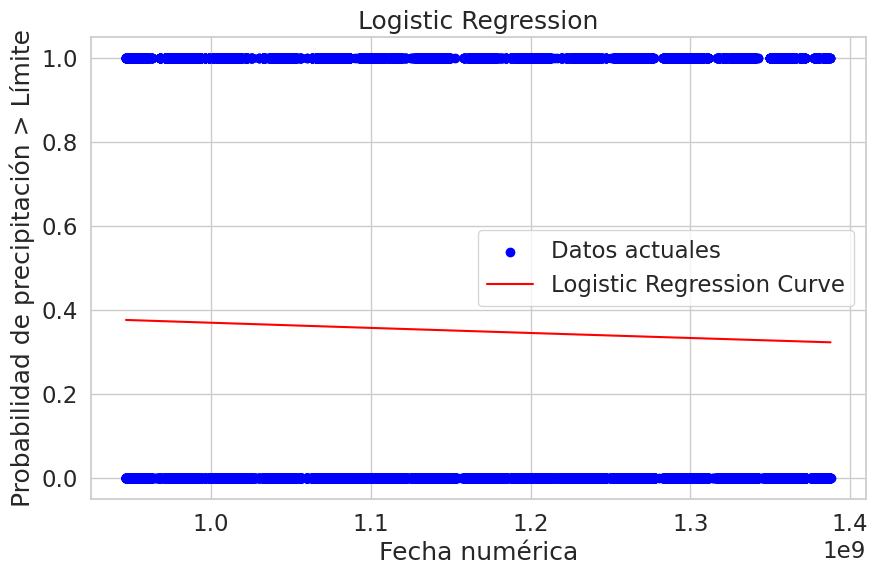

In [100]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# 1. Prepare the data
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Independent variable
# Convert 'HPCPcm' to binary classes (0 or 1) based on a threshold (e.g., median)
threshold = new_df['HPCPcm'].median()
y = (new_df['HPCPcm'] > threshold).astype(int)  # Dependent variable (binary)

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Create and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# 6. Print the results
print('Accuracy:', accuracy)
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', class_report)

# 7. Plot the results (sigmoid curve)
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
y_prob = model.predict_proba(X_range)[:, 1]  # Probability of class 1

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Datos actuales')
plt.plot(X_range, y_prob, color='red', label='Logistic Regression Curve')
plt.xlabel('Fecha numérica')
plt.ylabel('Probabilidad de precipitación > Límite')
plt.title('Logistic Regression')
plt.legend()
plt.show()

### La mediana no da buenas metricas. Se decide hacer clasificación de las lluvias en el rango de LLUVIAS FUERTES >= 50 mmm y Lluvia débiles < 50 mm.

##Clasificación de la lluvia

In [101]:
# Crea una nueva columna 'Clasificación_lluvia' con valores iniciales 'Lluvia débil'
new_df['Clasificación_lluvia'] = 'Lluvia débil'

# Asigna 'Lluvia fuerte' donde 'HPCPcm' sea mayor o igual a 50
new_df.loc[new_df['HPCPcm'] >= 50, 'Clasificación_lluvia'] = 'Lluvia fuerte'

# Imprime el DataFrame con la nueva columna
new_df

,# STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP(cm),NUMERIC_DATE,HPCPcm,Clasificación_lluvia
0,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 01:00,0.00,946688400,0.0,Lluvia débil
1,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 02:00,0.00,946692000,0.0,Lluvia débil
2,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 05:00,0.00,946702800,0.0,Lluvia débil
3,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 06:00,0.00,946706400,0.0,Lluvia débil
4,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12778,-123.22056,20000101 08:00,0.51,946713600,5.1,Lluvia débil
...,...,...,...,...,...,...,...,...,...,...
23834,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 09:00,0.25,1387789200,2.5,Lluvia débil
23835,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 12:00,0.00,1387800000,0.0,Lluvia débil
23836,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 13:00,0.00,1387803600,0.0,Lluvia débil
23837,COOP:352709,EUGENE MAHLON SWEET FIELD OR US,107.6,44.12780,-123.22060,20131223 19:00,0.51,1387825200,5.1,Lluvia débil


#Usando Redes Neuronales

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


149/149 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Mean Squared Error: 84.8810052965992
R^2 Score: 0.0036396561183026366


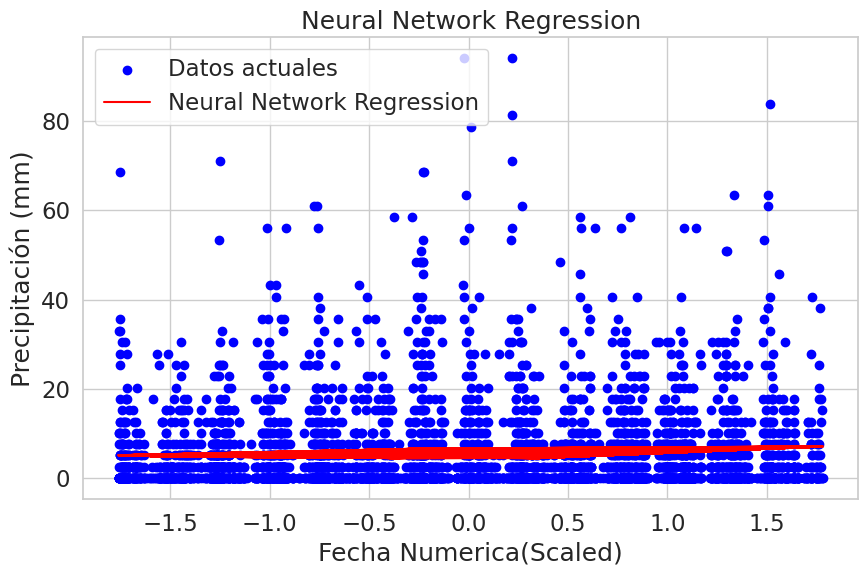

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# 1. Prepare the data
X = new_df['NUMERIC_DATE'].values.reshape(-1, 1)  # Independent variable
y = new_df['HPCPcm']  # Dependent variable

# 2. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Scale the data (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 4. Create the neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(1,)))  # Input layer with 64 neurons
model.add(Dense(32, activation='relu'))  # Hidden layer with 32 neurons
model.add(Dense(1))  # Output layer (regression, so no activation function)

# 5. Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# 6. Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# 7. Make predictions
y_pred = model.predict(X_test)

# 8. Calculate metrics (e.g., MSE, R^2)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('R^2 Score:', r2)


# 9. Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Datos actuales')
plt.plot(X_test, y_pred, color='red', label='Neural Network Regression')
plt.xlabel('Fecha Numerica(Scaled)')
plt.ylabel('Precipitación (mm)')
plt.title('Neural Network Regression')
plt.legend()
plt.show()

Nota: La regresión a traves de redes neuronales mejora el MSE y R2 MSE: 84.73 y R^2: 0.00536, pero no lo suficiente por lo que se decide que este dataset esta para clasificacion y no para regresión.

#Modelado de la serie de tiempo usando ARIMA
ARIMA es un modelo común para series de tiempo que incluye componentes autorregresivos, diferenciación y promedios móviles.        
NOTA: Se uso inteligencia artificial para generar el código

##Análisis exploratorio

count    23836.000000
mean         5.309511
std          9.337102
min          0.000000
25%          0.000000
50%          2.500000
75%          7.600000
max         96.500000
Name: HPCPcm, dtype: float64


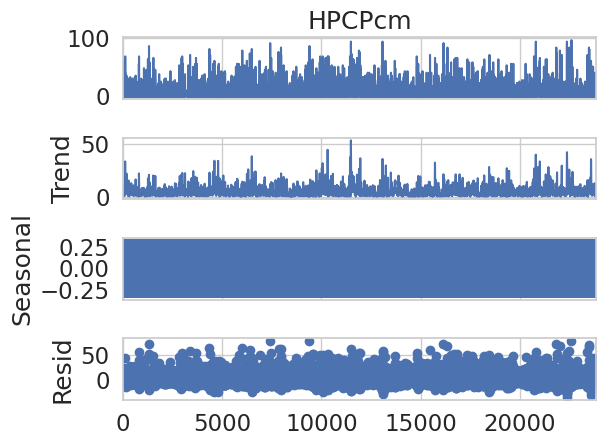

In [103]:
#Calcular estadísticas básicas
print(new_df['HPCPcm'].describe())

# Descomposición de la serie de tiempo (tendencia, estacionalidad y residuo)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(new_df['HPCPcm'], model='additive', period=12)  # Ajuste el periodo según los datos
decomposition.plot()
plt.show()

##Preparación de datos para el modelado

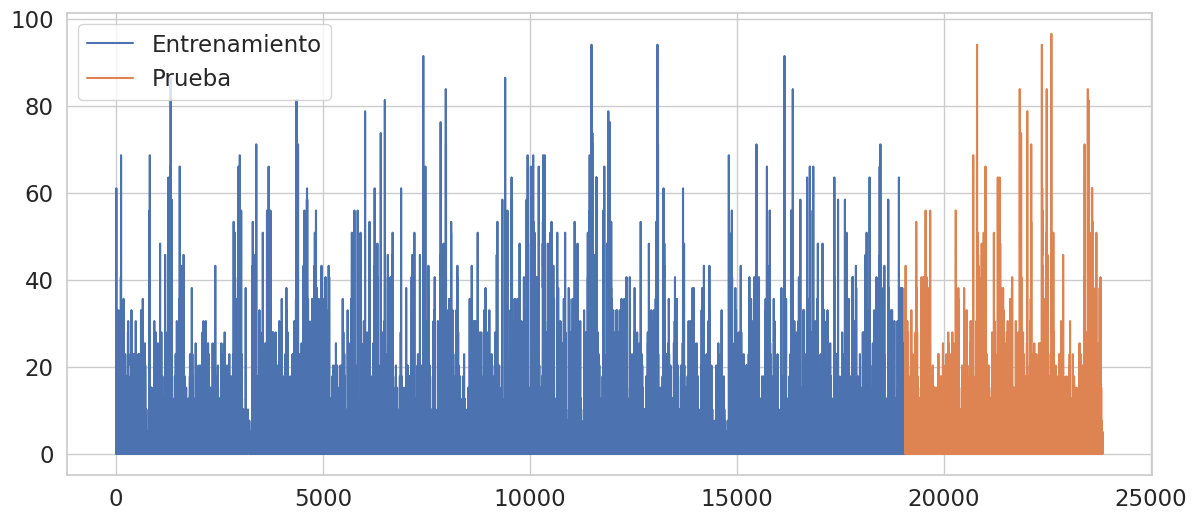

In [104]:
# Dividir los datos en entrenamiento y prueba (80% para entrenar y 20% para prueba)
train_size = int(len(new_df) * 0.8)
train, test = new_df[:train_size], new_df[train_size:]

# Visualizar la división
plt.figure(figsize=(14,6))
plt.plot(train['HPCPcm'], label="Entrenamiento")
plt.plot(test['HPCPcm'], label="Prueba")
plt.legend()
plt.show()

##Modelado de la serie de tiempo usando ARIMA

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 HPCPcm   No. Observations:                19068
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -66471.875
Date:                Sat, 16 Nov 2024   AIC                         132949.749
Time:                        01:04:45   BIC                         132973.316
Sample:                             0   HQIC                        132957.477
                              - 19068                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4884      0.003    149.997      0.000       0.482       0.495
ma.L1         -0.9915      0.001  -1234.402      0.000      -0.993      -0.990
sigma2        62.4550      0.219    285.734      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


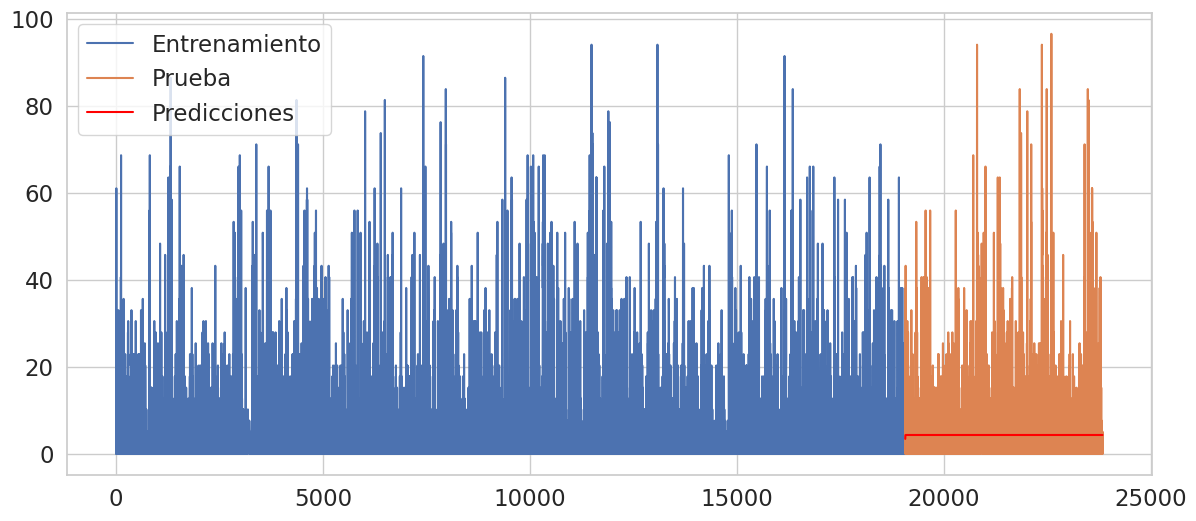

In [105]:
from statsmodels.tsa.arima.model import ARIMA

# Definir y ajustar el modelo ARIMA
model = ARIMA(train['HPCPcm'], order=(1, 1, 1))  # Ajuste el orden (p,d,q) según la serie
model_fit = model.fit()

# Resumen del modelo
print(model_fit.summary())

# Realizar predicciones
predictions = model_fit.forecast(steps=len(test))

# Visualizar las predicciones en el conjunto de prueba
plt.figure(figsize=(14,6))
plt.plot(train['HPCPcm'], label="Entrenamiento")
plt.plot(test['HPCPcm'], label="Prueba")
plt.plot(test.index, predictions, label="Predicciones", color='red')
plt.legend()
plt.show()

##Evaluación del modelo

In [106]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Calcular métricas de error
mse = mean_squared_error(test['HPCPcm'], predictions)
mae = mean_absolute_error(test['HPCPcm'], predictions)
r2 = r2_score(test['HPCPcm'], predictions)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R^2: {r2}")

MSE: 99.58642802337758
MAE: 5.9298382349192975
R^2: -0.01915463775970827


Nota: Con estos resultados podemos darnos cuenta que LAS PREDICIONES NO SON BUENAS y por el contraio se obtienen métricas peores en comparación de las métricas obtenidas en las diferetes regresiones realizadas previamente.

##Predicciones futuras

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


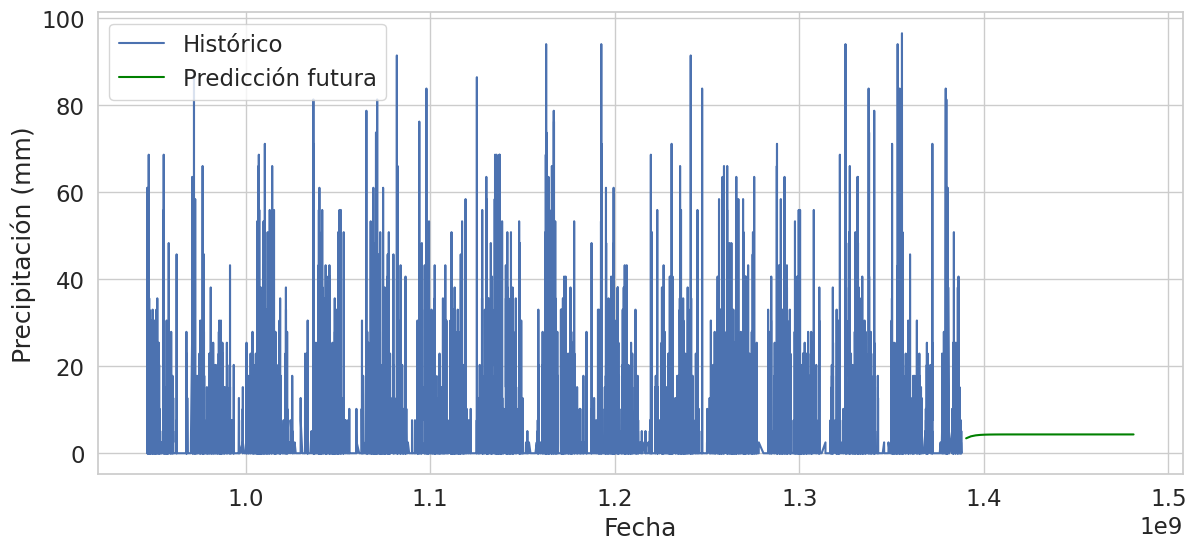

In [107]:
# Hacer predicciones a futuro (por ejemplo, para los próximos 36 periodos)
future_predictions = model_fit.forecast(steps=36)

# Obtener la última fecha numérica del conjunto de datos histórico
last_numeric_date = new_df['NUMERIC_DATE'].iloc[-1]

# Generar una secuencia de fechas numéricas futuras (asumiendo una frecuencia mensual)
future_numeric_dates = [last_numeric_date + i * (3600 * 24 * 30) for i in range(1, 37)]

# Visualizar las predicciones futuras
plt.figure(figsize=(14, 6))
plt.plot(new_df['NUMERIC_DATE'], new_df['HPCPcm'], label="Histórico")
plt.plot(future_numeric_dates, future_predictions, label="Predicción futura", color='green')
plt.xlabel("Fecha") # Agregar etiqueta al eje X
plt.ylabel("Precipitación (mm)") # Agregar etiqueta al eje Y
plt.legend()
plt.show()

Conclusión: El uso de las series temporales a través de modelado de la serie de tiempo usando ARIMA NO FUNCIONA y se descarta tambien.
Se recomienda utilizar otro tipo de modelo y arreglar los datos del dataset en el contexto de precipitación media diaria